<a href="https://colab.research.google.com/github/Amjad-Bin-Aslam/Data-Analysis-Practice/blob/main/04_Pandas/01_Pandas_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Pandas?
It is a fast, flexible and easy to use open source data analysis and manipulation tool, built on the top of python programming language.

## What pandas can do?

* Read from files (CSV, Excel, JSON, SQL)
* Clean messy data
* Filter and sort rows
* Group and summarize data
* Add, delete and update columns
* Perform fast calculations

## Importance

* Faster than excel for large data
* Works well with numPy, Matplotlib, Seaborn
* Essential for Data Science, Machine Learning and AI

# Pandas Series
A one-dimensional array. It is like columns in the table.

In [131]:
import numpy as np
import pandas as pd



## Series from lists

In [132]:
# string
country = ['Saudia', 'Pakistan', 'UAE', 'Turky']

pd.Series(country)

,0
0,Saudia
1,Pakistan
2,UAE
3,Turky


In [133]:
# Integers
runs = [34,56,67,78,45,70]

pd.Series(runs)


,0
0,34
1,56
2,67
3,78
4,45
5,70


In [134]:
# Custom index
marks = [70,65,90,100]
subjects = ['math', 'english', 'urdu', 'computer']

pd.Series(marks,index=subjects)

,0
math,70
english,65
urdu,90
computer,100


In [135]:
# Setting the name
pd.Series(marks, index=subjects, name="My marks")

,My marks
math,70
english,65
urdu,90
computer,100


## Series from dict

In [136]:
marks = {
    'math': 70,
    'english':65,
    'urdu': 90,
    'computer': 100
}

marks_series = pd.Series(marks, name="My marks")
print(marks_series)

math         70
english      65
urdu         90
computer    100
Name: My marks, dtype: int64


# Series Attributes

## .size
give the number of items in a series

In [137]:
marks # Python dictionary
print(marks_series) # Pandas series object

print("No. of items",marks_series.size)

math         70
english      65
urdu         90
computer    100
Name: My marks, dtype: int64
No. of items 4


## .dtype
tells about the data type of items/elements

In [138]:
marks_series.dtype

dtype('int64')

## .name
Return name attribute of series

In [139]:
marks_series.name

'My marks'

## .is_unique
tell that all the elements are unique or not and return ture/false value

In [140]:
print(marks_series.is_unique)

print(pd.Series([1,12,1,22,22,44]).is_unique)

True
False


## .index
Give indexes of series without values

In [141]:
marks_series.index

Index(['math', 'english', 'urdu', 'computer'], dtype='object')

## .values
Return all values in series without index number

In [142]:
marks_series.values

array([ 70,  65,  90, 100])

# Series using read_csv
By default read_csv return data frames but we can change it into series

In [146]:
df = (pd.read_csv('/content/subs.csv'))
print(type(df))
print(df)
series_file = pd.read_csv('/content/subs.csv').squeeze("columns")
print("Name: ",series_file.name)
print(series_file)

<class 'pandas.core.frame.DataFrame'>
     Subscribers gained
0                    48
1                    57
2                    40
3                    43
4                    44
..                  ...
360                 231
361                 226
362                 155
363                 144
364                 172

[365 rows x 1 columns]
Name:  Subscribers gained
0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64


In [147]:
file = pd.read_csv("/content/subs2.csv",index_col="match_no").squeeze('columns')
print(type(file))
print(file)

<class 'pandas.core.series.Series'>
match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64


# Series Methods

## head()
Just give preview of data. By default return top 5 rows.

In [ ]:
file.head()

,runs
match_no,
1,1
2,23
3,13
4,12
5,1


## tail()
By default Return data of last five rows

In [ ]:
file.tail(3)

,runs
match_no,
213,73
214,25
215,7


## sample()
randomly retunr the rows from series

In [ ]:
file.sample(3)

,runs
match_no,
52,70
182,50
99,73


## value_counts()
Return frequncy of each element in series

In [ ]:
movies = pd.read_csv('/content/bollywood.csv',index_col='movie').squeeze("columns")
print(type(movies))
movies.value_counts()

<class 'pandas.core.series.Series'>


,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Seema Azmi,1
Akanksha Puri,1
Charanpreet Insan,1


## sort_values()
Used for sorting values in the series
Sorting can be ascending or descending
*  if we right inplace keyword then it will sort the series permanantly
 sort_values(inplace=True)

In [150]:
print(file.sort_values())

match_no
8        0
87       0
93       0
91       0
206      0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64


In [153]:
# Finding Highiest Score
# Method chaining
print(file.sort_values(ascending=False).head(1).values[0])

113


## sort_index()
use to sort the index values
inplace parameter permanantly change the series

In [156]:
movies
print(movies.sort_index())

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object


## info()
provide the overview of data frames/series

In [206]:
print(movies.info())

<class 'pandas.core.series.Series'>
Index: 1500 entries, Uri: The Surgical Strike to Awara Paagal Deewana
Series name: lead
Non-Null Count  Dtype 
--------------  ----- 
1500 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB
None


# Series Math Methods

## count()
Give total number of items present in series.it gives only non-missing values

In [160]:
file
print(file.count())

215


## sum() and product()
gives sum and product of all values

In [165]:
print(file.sum())
print(file.product())

6634
0


## mean -> median -> mode -> std -> var

In [168]:
# Return average
print(file.mean())

30.855813953488372


In [172]:
# return the most repeated value
print(movies.mode())

0    Akshay Kumar
Name: lead, dtype: object


In [175]:

print(file.median())
print(file.std())

24.0
26.22980132830278


# min/max
Return min/max values from series

In [174]:
# Maximum value
file.max()

113

In [176]:
# Minimum value
file.min()

0

## describe
it provides the summary of all mathematical functions

In [179]:
file
file.describe()

,runs
count,215.000000
mean,30.855814
std,26.229801
min,0.000000
25%,9.000000
50%,24.000000
75%,48.000000
max,113.000000


# Series Indexing
Return tha value against the provided index

In [189]:
x = pd.Series([12,13,14,15,16,17,18])
print(x[0]) # label or position indexing
print(x.loc[0]) # label indexing
print(x.iloc[0]) # position indexing
print(x[x>16]) # condition indexing

12
12
12
5    17
6    18
dtype: int64


In [198]:
# fancy indexing
file[[1,3,5,7]]

,runs
match_no,
1,1
3,13
5,1
7,34


# Series Slicing

In [196]:
s = pd.Series([10,20,40,50])
# start index included, end index excluded
# by position
print("Position based Slicing: ",s[1:4])
# by label
x = pd.Series([10,20,30,40,50], index=['a','b','c','d','e'])
print("Label indexing: ", x.loc["b":"d"])

Position based Slicing:  1    20
2    40
3    50
dtype: int64
Label indexing:  b    20
c    30
d    40
dtype: int64


# Editing series

In [203]:
# using index
print("----Before editing value")
print(marks_series)
print("-----After editing value-----")
marks_series[0] = 100
print(marks_series)

----Before editing value
math        100
english      65
urdu         90
computer    100
Name: My marks, dtype: int64
-----After editing value-----
math        100
english      65
urdu         90
computer    100
Name: My marks, dtype: int64


/tmp/ipython-input-426626881.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[0] = 100


In [205]:
# if the index does not exist, then it will create new index with value
marks_series['sst'] = 90
print(marks_series)


math        100
english      65
urdu         90
computer    100
sst          90
Name: My marks, dtype: int64


# Series With Python Functionalities

In [213]:
# len/type/dir/sorted/max/min
print(len(file))
print(type(file))
print(dir(file)) # it tells about all the methods and attributes in series.
print(sorted(file))
print(max(file))
print(min(file))

215
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

In [217]:
# Type conversion
marks_series
print(list(marks_series))
print(dict(marks_series))
print(marks_series)


[100, 65, 90, 100, 90]
{'math': np.int64(100), 'english': np.int64(65), 'urdu': np.int64(90), 'computer': np.int64(100), 'sst': np.int64(90)}
math        100
english      65
urdu         90
computer    100
sst          90
Name: My marks, dtype: int64


In [220]:
# looping
for i in marks_series:
  print(i)

100
65
90
100
90


In [224]:
# Arithmetic Operators (That concept is called broadcasting)
# we can use all the arithmetic operators here
100 - marks_series

,My marks
math,0
english,35
urdu,10
computer,0
sst,10


In [230]:
# Relational
a = file >= 50
print(a[a].size)

50


In [233]:
# find the actors who have done more than 20 movies
num_movies = movies.value_counts()
print(num_movies)
num_movies[num_movies > 20]

lead
Akshay Kumar         48
Amitabh Bachchan     45
Ajay Devgn           38
Salman Khan          31
Sanjay Dutt          26
                     ..
Seema Azmi            1
Akanksha Puri         1
Charanpreet Insan     1
Jaideep Ahlawat       1
Monali Thakur         1
Name: count, Length: 566, dtype: int64


,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
Shah Rukh Khan,22
Emraan Hashmi,21


# Plotting graphs on series

<class 'pandas.core.series.Series'>
0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64


<Axes: >

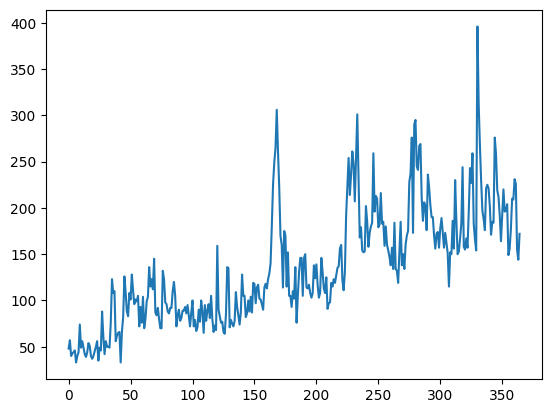

In [240]:
sub = pd.read_csv('/content/subs.csv').squeeze('columns')
print(type(sub))
print(sub)
sub.plot()